<a href="https://colab.research.google.com/github/Shreyathalanki26/CodeClauseInternship_Brain-Tumor-Detection-with-Data-Science/blob/main/Brain_Tumor_Detection_with_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SHREYA THALANKI

### *Codeclause Internship*
### Sr.No : 1 - Brain Tumor Detection with Data Science
Brain tumor detection project utilizes advanced machine learning algorithms to analyze medical imaging data, such as MRI scans, for accurate and early detection of brain tumors. Leveraging a diverse dataset, we employ feature engineering, image processing, and deep learning techniques to create a robust predictive model. By harnessing the power of data science, our project aims to improve diagnostic precision, enable timely intervention, and enhance patient outcomes in the battle against brain tumors.


##**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## **Prepare/collect data**

Data is collected from the drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

path = os.listdir('/content/drive/MyDrive/brain_tumor/Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [6]:
np.unique(Y)

array([0, 1])

In [7]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [8]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

## **Data Visualization**

Data visualization displays the graphical representation of information stored in the particular area.


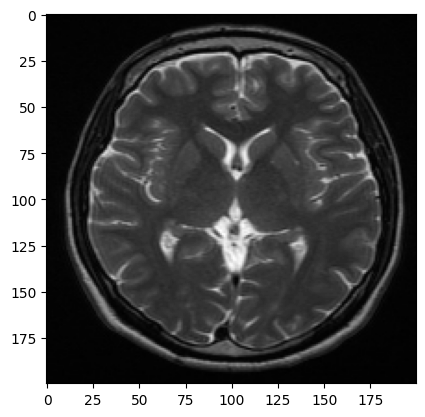

In [9]:
plt.imshow(X[0], cmap='gray')

## **Reshaping the data**

Reshaping the data organizes the data into rows and columns.

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

## **Split Data into Training and Testing Sets**

In this step, data is split into two parts which are training set and testing set. The model is trained on training dataset and testing part
 tests its accuracy on the data.



In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.10)

In [12]:
xtrain.shape, xtest.shape

((1099, 40000), (123, 40000))

## **Feature Scaling**

In this step, minmax scaling technique is used to bring all the feature values to less than or equal to 1.
In order to do so, we have divided the training data by its maximum value.

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


## **Feature Selection: PCA**

Principal Component Analysis (PCA) is a dimensionality reduction technique used in data analysis. It transforms high-dimensional data into a lower-dimensional space, retaining essential patterns while minimizing information loss. By identifying principal components, it aids in visualizing, understanding, and simplifying complex datasets, making it valuable for feature selection tasks.

In [14]:
from sklearn.decomposition import PCA

In [15]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(1099, 40000) (123, 40000)


In [16]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

## **Model Training**

Model training is a crucial step where an algorithm learns patterns from a labeled dataset. The model iteratively adjusts its parameters using optimization methods to minimize prediction errors. Once trained, the model can make predictions on new, unseen data, enabling it to generalize and perform its intended task.

Logistic Regression and Support Vector Classifier(SVC) are used.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

By importing the warnings module, developers can control the behavior of warnings, such as filtering them, displaying them as exceptions, or ignoring them altogether.

**Logistic Regression**

In [18]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

**Support Vector Classifier**

In [19]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

## **Model Evaluation**


Model evaluation compares its predictions with actual data to measure accuracy, precision, recall, F1-score, and other metrics. The scores of both the models are compared.

In [20]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.943089430894309


In [21]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9936305732484076
Testing Score: 0.9512195121951219


## **Making a Predictive System**

In this step, the test dataset will be predicted. The model makes accurate predictions based on input data.

In [22]:
pred = sv.predict(xtest)


In [23]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 3,  6, 53, 54, 60, 94]),)

In [24]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  6
1 1


## **Model Testing**

Model testing assesses the performance of a trained machine learning model using a separate test dataset. The model makes predictions on the test data, and its output is compared to the true labels to calculate various evaluation metrics.

In [25]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

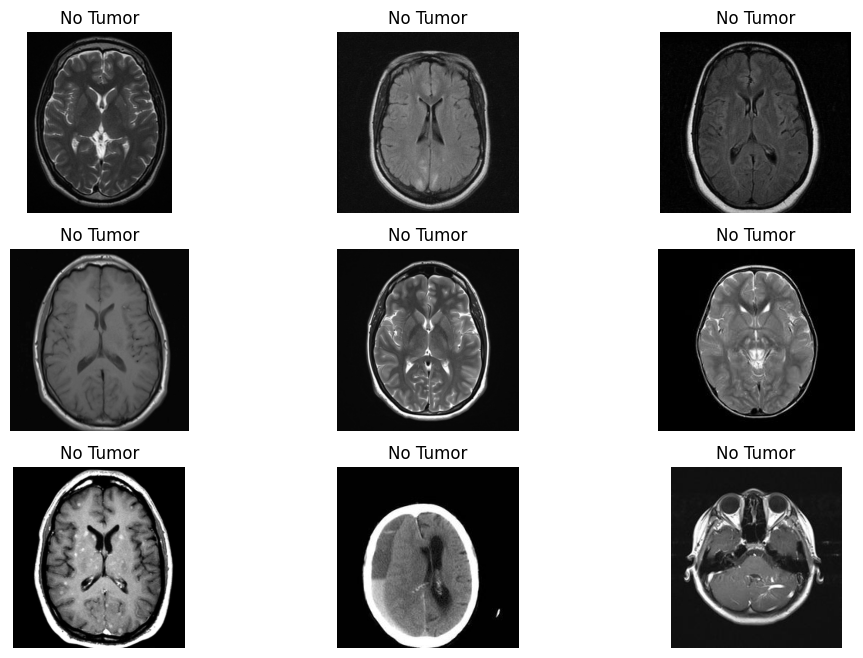

In [26]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/brain_tumor/Testing')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Training/no_tumor')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/drive/MyDrive/brain_tumor/Training/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

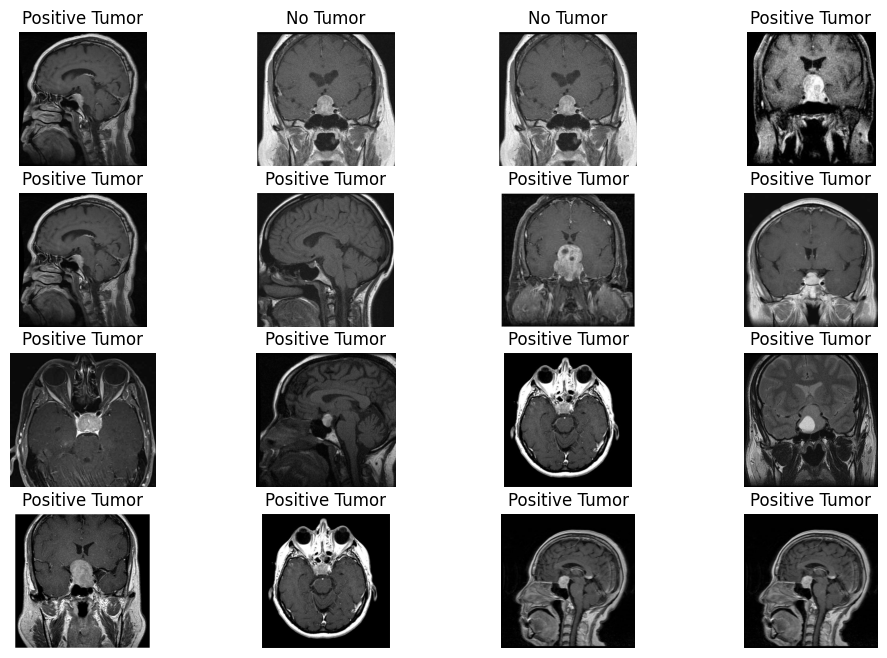

In [27]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/brain_tumor/Testing')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor')[:16]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1